In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = iris.data[:,:2]
y = iris.data[:,2]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [8]:
format(np.power(y -lr.predict(X),2).mean())

'0.40957831218050467'

In [18]:
print("The MSE is: {:.2}".format(np.power(y -lr.predict(X),2).mean()))

The MSE is: 0.41


In [17]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X, y)
print("The MSE is: {:.2}".format(np.power(y -knnr.predict(X),2).mean()))


The MSE is: 0.17


### Let's look at what the KNN regression does when we tell it to use the 10 closest points for regression:


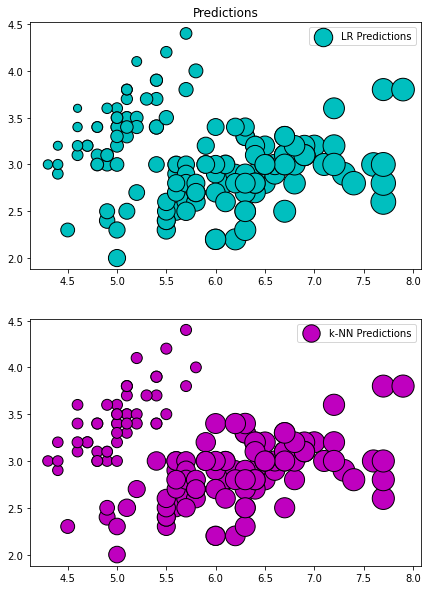

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
f, ax = plt.subplots(nrows=2, figsize=(7, 10))
ax[0].set_title("Predictions")
ax[0].scatter(X[:, 0], X[:, 1], s=lr.predict(X)*80, label='LR Predictions', color='c', edgecolors='black')
ax[1].scatter(X[:, 0], X[:, 1], s=knnr.predict(X)*80, label='k-NN Predictions', color='m', edgecolors='black')
ax[0].legend()
ax[1].legend()

### It might be completely clear that the predictions are close for the most part, but let's look at the predictions for the Setosa species as compared to the actuals

In [22]:
setosa_idx = np.where(iris.target_names=='setosa')
setosa_mask = iris.target == setosa_idx[0]
y[setosa_mask][:5]

array([1.4, 1.4, 1.3, 1.5, 1.4])

In [23]:
knnr.predict(X)[setosa_mask][:5]

array([1.46, 1.45, 1.51, 1.42, 1.5 ])

In [24]:
lr.predict(X)[setosa_mask][:5]

array([1.84557896, 2.1597721 , 1.53692893, 1.49323201, 1.53415738])

### Looking at the plots again, we see that the setosa species (upper-left cluster) is largely overestimated by linear regression, and KNN is fairly close to the actual values.

In [25]:
example_point = X[0]

In [26]:
from sklearn.metrics import pairwise
distances_to_example = pairwise.pairwise_distances(X)[0]
ten_closest_points = X[np.argsort(distances_to_example)][:10]
ten_closest_y = y[np.argsort(distances_to_example)][:10]
ten_closest_y.mean()

1.46